<a href="https://colab.research.google.com/github/mohit2520/Assignment-2-Problems-using-Data-Preprocessing/blob/main/Estimate_the_total_compensation_to_be_provided_to_an_employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import the libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train_set.csv to train_set (4).csv


In [5]:
# Read the csv file 
df = pd.read_csv("train_set.csv")

In [6]:
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [7]:
# to see random file 
df.sample(5)

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
120557,2013,4,Community Health,DPH,Public Health,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,39704,41667,429,7655.25,Calendar,67400
183556,2014,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",Med Therapy & Auxiliary,Health Worker 3,26479,65055,0,13054.94,Calendar,102109
210183,2013,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",Street Transit,Transit Operator,47671,69988,26468,14179.51,Calendar,143972
219066,2014,4,Community Health,DPH,Public Health,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Med Therapy & Auxiliary,Occupational Therapist,25664,107189,0,12518.54,Fiscal,150751
56438,2013,4,Community Health,DPH,Public Health,164,Physicians and Dentists - Miscellaneous,Medical & Dental,Physician Specialist,32703,120347,0,8899.24,Calendar,165083


In [8]:
# get the number of rows and cols
df.shape

(287836, 15)

In [9]:

# get the cols data type
df.dtypes

Year                    int64
OGC                     int64
OG                     object
DC                     object
Dept                   object
UC                      int64
Union                  object
JF                     object
Job                    object
EI                      int64
Salaries                int64
Overtime                int64
H/D                   float64
YT                     object
Total_Compensation      int64
dtype: object

In [10]:
# get a count of the empty value for each column
df.isna().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [11]:
# check for any missing /null value in data
df.isnull().values.any()

True

In [12]:
df['Union'].nunique()

73

In [13]:
df['JF'].nunique()


55

In [14]:
df.columns

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT', 'Total_Compensation'],
      dtype='object')

In [15]:
# get the correlation
df.corr()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
Year,1.000000,-0.005849,-0.003789,0.002081,0.004376,0.015024,-0.013705,0.005986
OGC,-0.005849,1.000000,-0.006246,0.002137,-0.217733,-0.303169,-0.233033,-0.270160
UC,-0.003789,-0.006246,1.000000,-0.001493,-0.047408,0.059816,-0.073297,-0.032338
EI,0.002081,0.002137,-0.001493,1.000000,-0.004385,-0.001167,-0.003472,-0.003966
Salaries,0.004376,-0.217733,-0.047408,-0.004385,1.000000,0.271575,0.774898,0.972585
Overtime,0.015024,-0.303169,0.059816,-0.001167,0.271575,1.000000,0.312468,0.453497
H/D,-0.013705,-0.233033,-0.073297,-0.003472,0.774898,0.312468,1.000000,0.806283
Total_Compensation,0.005986,-0.270160,-0.032338,-0.003966,0.972585,0.453497,0.806283,1.000000


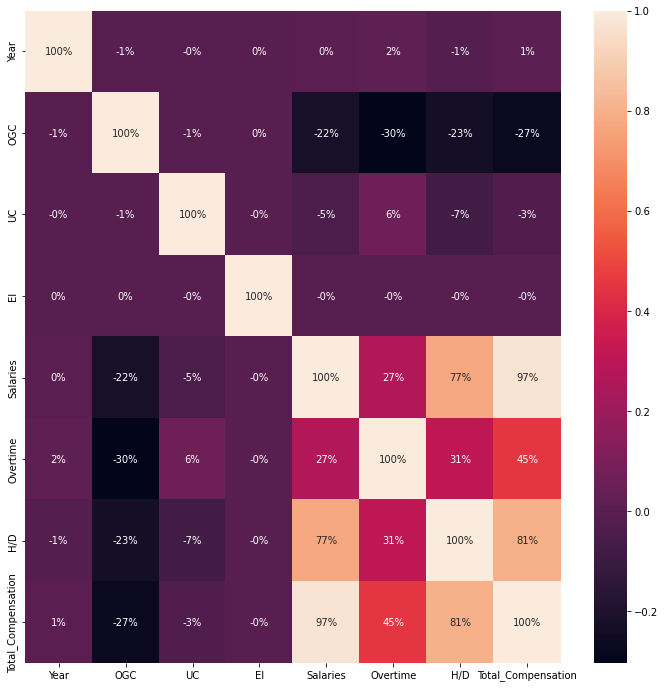

In [16]:
# Visualize the correlation
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, fmt='.0%' )

In [17]:
# drop left column
df_new = df.drop(['OG', 'DC', 'Dept','Union', 'JF', 'Job','YT'] , axis = 1) 

In [18]:
df_new = df_new.drop(['Year','OGC','UC','EI'] , axis = 1)

In [19]:
df_new

,Salaries,Overtime,H/D,Total_Compensation
0,12196,0,0.00,16158
1,74639,2820,12703.31,115784
2,100554,0,12424.50,144708
3,140164,52754,13043.87,242323
4,58813,0,7655.28,82106
...,...,...,...,...
287831,78980,30115,13068.80,147079
287832,30704,0,5465.57,40174
287833,104451,0,13054.94,164669
287834,14425,0,4051.90,19594


In [20]:
# Split the data
X=df_new.iloc[ : , :-1].values
Y=df_new.iloc[ : , -1].values

In [21]:
# Split the data into 75% training  and 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25 , random_state = 0)

In [ ]:
# Use random forest classifier 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion='entropy',random_state =0)
forest.fit(X_train,Y_train)

In [ ]:
# Get the accuracy on the training data set
forest.score(X_train,Y_train)